### Importancion de datos
En estas líneas de código en Python, se están importando bibliotecas esenciales para el análisis de datos y estadísticas. Pandas permite la manipulación ágil de datos, NumPy proporciona operaciones numéricas eficientes, Statsmodels facilita el modelado estadístico, SciPy ofrece funciones estadísticas avanzadas y Matplotlib posibilita la creación de gráficos claros y visuales. Estas herramientas combinadas permiten cargar, analizar y visualizar datos, así como realizar análisis estadísticos y modelado, todo dentro del entorno de programación Python.

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt

### Carga de datos y mostreo
Utilizando la libreria de pandas hacemos un llamdo de el archivo que estaremos utilizando para este analisis de informacion. Todos los datos los tenemos guardados en archivos csv. 

Con la funcion de pandas .head() podemos ver y analizar los datos de las primeras 5 filas de nuestra base de datos.

In [24]:
df = pd.read_csv('./Archivo/501.csv', encoding='iso-8859-1')

In [25]:
df.head()

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
0,2021-03-24 14:42:03.839,-0.999023,-0.063477,0.140625,-0.980469,-0.112061,-0.048096,6
1,2021-03-24 14:42:03.859,-0.980225,-0.079346,0.140625,-0.961182,-0.121582,-0.051758,6
2,2021-03-24 14:42:03.880,-0.950195,-0.076416,0.140625,-0.949463,-0.080566,-0.067139,6
3,2021-03-24 14:42:03.900,-0.954834,-0.059082,0.140381,-0.957520,-0.046143,-0.050781,6
4,2021-03-24 14:42:03.920,-0.972412,-0.042969,0.142822,-0.977051,-0.023682,-0.026611,6


### Graficacion inicial.

 Estas siguienten líneas de código nos permiten visualizar la distribución y variación de los valores en las columnas 'back_x', 'back_y' y 'back_z' a lo largo de las filas del DataFrame. Estas gráficas iniciales nos brindarán una idea rápida de cómo se comportan estos valores y podrían sugerir relaciones o tendencias que podrían ser exploradas con análisis posteriores.

 Se decidio usar los valores del medidor de "back" ya que se creyo que podria ser un mejor indicardor que el de "thigh".

 

<Axes: xlabel='index'>

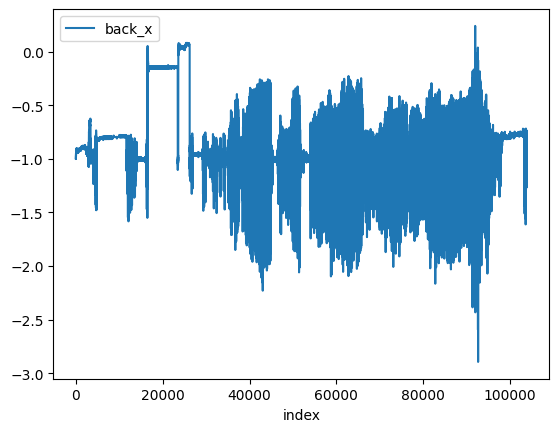

In [26]:
df.reset_index().plot(x = 'index', y = 'back_x')

<Axes: xlabel='index'>

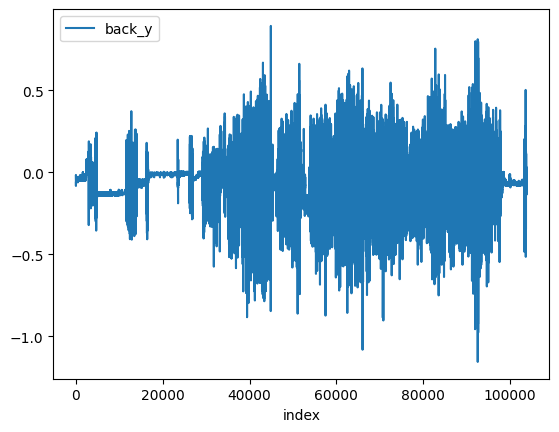

In [27]:
df.reset_index().plot(x = 'index', y = 'back_y')

<Axes: xlabel='index'>

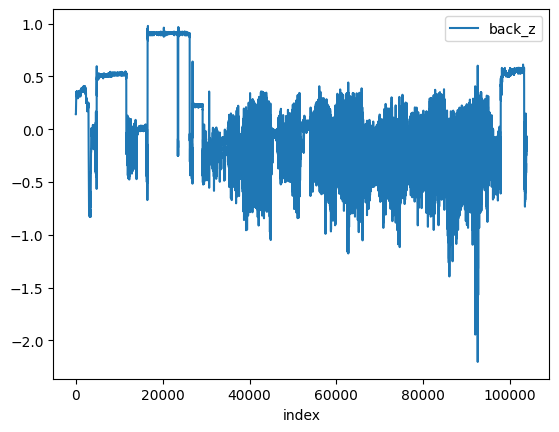

In [28]:
df.reset_index().plot(x = 'index', y = 'back_z')

### Separacion de informacion por labels.

Al analizar las graficas que generamos llegamos a la conclusion que podrian ser mas entendibles si estas se separaran por cada uno de los valores de "labels". Estos valores nos indica la actividad que se estaba llevando acabo en cada toma de dato.

Para eso se creo una lista con cada uno de los valores donde se marcaba el inicio de una nueva actividad.

In [29]:
label_change_indices = []
previous_label = None

for index, row in df.iterrows():
    label = row['label']
    
    if previous_label is None:
        previous_label = label
    elif label != previous_label:
        label_change_indices.append(index)
        previous_label = label


Para que nuestras graficas sean mas faciles de leer decidimmos limitar la cantidad de datos que mostramos en las siguientes graficas, para eso generamos una nueva base de datos que se divide desde el primer valos hacia uno de los valores generados en la lista anterior.

In [30]:
xset = label_change_indices[2]
split_df = df.iloc[0:xset]

### Grafica para visualizar el movimiento.

La siguientes gráficas muestra cómo varían los valores de la columna 'back_z' de nuestro conjunto de datos a medida que transcurre el tiempo. En este caso, estamos marcando momentos de cambio y agregando una línea que indica cuándo se producen cambios en nuestras actividades. La leyenda en la gráfica proporciona información sobre las diferentes actividades relacionadas con los valores de etiquetas en nuestros datos originales, lo que nos ayuda a comprender qué actividades específicas estamos visualizando.

Sin embargo, nos dimos cuenta de que esta visualización no refleja directamente nuestra posición, ya que los datos son de aceleración. Para lograr una representación más precisa de nuestra posición, necesitaríamos realizar una doble integración de los datos.

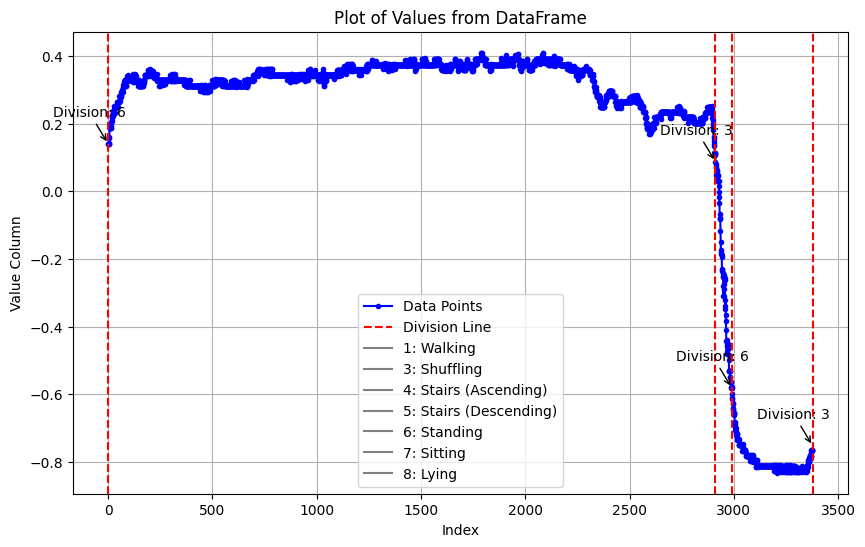

In [31]:
plot_value = 'back_z'

plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.plot(split_df.index, split_df[plot_value], marker='.', linestyle='-', color='blue', label='Data Points')

plt.axvline(x=0, color='red', linestyle='--', label='Division Line')
division_value = df.loc[0, 'label']
plt.annotate(f'Division: {division_value}', xy=(0, df.loc[0, plot_value]),
                xytext=(-40, 20), textcoords='offset points',
                arrowprops=dict(arrowstyle='->', color='black'))

for data in label_change_indices:
    if data > xset:
        break
    plt.axvline(x=data, color='red', linestyle='--')
    division_value = df.loc[data, 'label']
    plt.annotate(f'Division: {division_value}', xy=(data, df.loc[data, plot_value]),
                 xytext=(-40, 20), textcoords='offset points',
                 arrowprops=dict(arrowstyle='->', color='black'))
plt.title('Plot of Values from DataFrame')
plt.xlabel('Index')
plt.ylabel('Value Column')
plt.grid(True)

# Leyenda de las actividades
activity_legend = {
    1: 'Walking',
    3: 'Shuffling',
    4: 'Stairs (Ascending)',
    5: 'Stairs (Descending)',
    6: 'Standing',
    7: 'Sitting',
    8: 'Lying'
}

handles, labels = plt.gca().get_legend_handles_labels()
for label_value, activity_name in activity_legend.items():
    if label_value in labels:
        continue
    plt.plot([], [], color='gray', label=f'{label_value}: {activity_name}')

plt.legend()

plt.show()

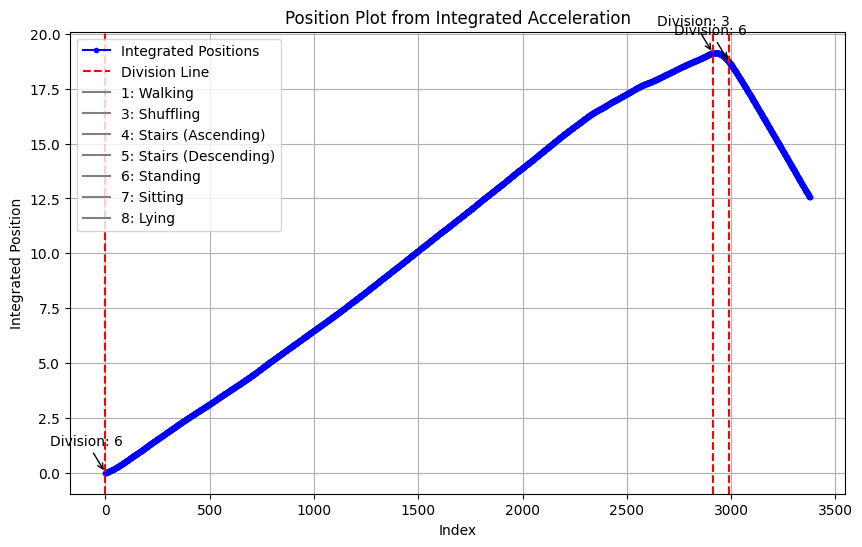

In [32]:
plot_value = 'back_z'  # Columna de aceleración a integrar

# Parámetros de integración
delta_t = 0.02  # Intervalo de tiempo entre muestras

# Integración numérica para convertir aceleración a posición
integrated_positions = [0.0]  # Empezamos con posición inicial en 0
for i in range(1, len(split_df)):
    acceleration = split_df.iloc[i][plot_value]
    velocity = integrated_positions[i - 1] + acceleration * delta_t
    integrated_positions.append(velocity)

plt.figure(figsize=(10, 6))
plt.plot(split_df.index, integrated_positions, marker='.', linestyle='-', color='blue', label='Integrated Positions')

plt.axvline(x=0, color='red', linestyle='--', label='Division Line')
division_value = df.loc[0, 'label']
plt.annotate(f'Division: {division_value}', xy=(0, integrated_positions[0]),
                xytext=(-40, 20), textcoords='offset points',
                arrowprops=dict(arrowstyle='->', color='black'))

for data in label_change_indices:
    if data >= xset:
        break
    plt.axvline(x=data, color='red', linestyle='--')
    division_value = df.loc[data, 'label']
    plt.annotate(f'Division: {division_value}', xy=(data, integrated_positions[data]),
                 xytext=(-40, 20), textcoords='offset points',
                 arrowprops=dict(arrowstyle='->', color='black'))

plt.title('Position Plot from Integrated Acceleration')
plt.xlabel('Index')
plt.ylabel('Integrated Position')
plt.grid(True)

# Leyenda de las actividades
activity_legend = {
    1: 'Walking',
    3: 'Shuffling',
    4: 'Stairs (Ascending)',
    5: 'Stairs (Descending)',
    6: 'Standing',
    7: 'Sitting',
    8: 'Lying'
}

handles, labels = plt.gca().get_legend_handles_labels()
for label_value, activity_name in activity_legend.items():
    if label_value in labels:
        continue
    plt.plot([], [], color='gray', label=f'{label_value}: {activity_name}')

plt.legend()

plt.show()

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(['timestamp', 'label'], axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Algunas razones por las que Random Forest podría ser una buena elección:

Capacidad de manejar múltiples características: Random Forest es capaz de manejar múltiples características (acelerómetro en diferentes direcciones en tu caso) y automáticamente seleccionar las más importantes.

Manejo de relaciones no lineales: Las actividades humanas pueden tener relaciones no lineales entre las características y las etiquetas. Los árboles de decisión y, por extensión, los bosques aleatorios pueden capturar estas relaciones no lineales.

Robustez ante ruido: Los datos reales suelen contener ruido y variabilidad. Random Forest es menos propenso a sobreajuste (ajuste excesivo a los datos de entrenamiento) en comparación con modelos más complejos, lo que ayuda a lidiar con el ruido.

Manejo de conjuntos de datos desequilibrados: Si tienes un desequilibrio en las clases (por ejemplo, muchas más muestras de caminar que de subir escaleras), Random Forest puede manejar esto de manera más efectiva.

Combina múltiples árboles: Random Forest combina la predicción de múltiples árboles de decisión, lo que ayuda a reducir la varianza y mejorar el rendimiento general del modelo.

In [34]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

C:\Users\luisr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\luisr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\luisr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469

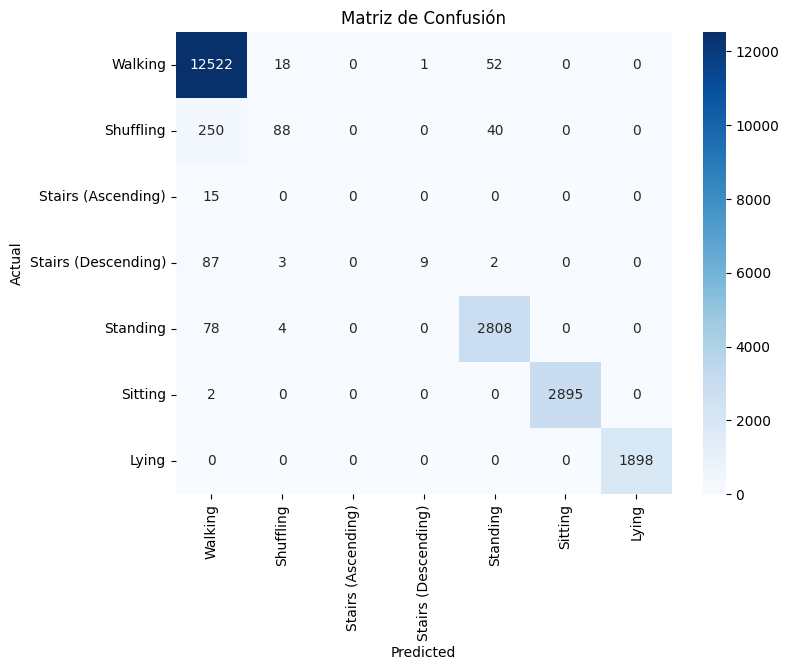

Accuracy: 0.9734257654534951
Classification Report:
               precision    recall  f1-score   support

           1       0.97      0.99      0.98     12593
           3       0.78      0.23      0.36       378
           4       0.00      0.00      0.00        15
           5       0.90      0.09      0.16       101
           6       0.97      0.97      0.97      2890
           7       1.00      1.00      1.00      2897
           8       1.00      1.00      1.00      1898

    accuracy                           0.97     20772
   macro avg       0.80      0.61      0.64     20772
weighted avg       0.97      0.97      0.97     20772



In [35]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

classes = ['Walking', 'Shuffling', 'Stairs (Ascending)', 'Stairs (Descending)','Standing', 'Sitting', 'Lying']

# Crear una figura y un eje para el gráfico
plt.figure(figsize=(8, 6))

# Usar seaborn para crear el heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classes, yticklabels=classes)

# Configurar etiquetas de los ejes y el título
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')

# Mostrar el gráfico
plt.show()


print("Accuracy:", accuracy)
print("Classification Report:\n", class_report)


Accuracy (Exactitud): El valor de la exactitud es 0.9734, lo que significa que nuestro modelo ha clasificado correctamente el 97.34% de las muestras en el conjunto de prueba. Es un indicador positivo, pero recordemos que la exactitud puede ser engañosa si las clases están desequilibradas.

Matriz de Confusión: La matriz de confusión muestra cómo se distribuyeron las predicciones del modelo en cada clase real. Aquí tenemos una interpretación de cada número en la matriz:

- En la primera fila, hemos predicho correctamente 12,522 muestras de la clase 1, pero cometimos 18 falsos negativos (clasificando como otra clase cuando en realidad era de la clase 1).
- En la segunda fila, predijimos correctamente 88 muestras de la clase 3, pero 250 se clasificaron incorrectamente.
- Las demás filas y columnas tienen interpretaciones similares.
Informe de Clasificación: El informe de clasificación proporciona métricas de precisión, recall (tasa de verdaderos positivos), f1-score y soporte para cada clase. Aquí algunas observaciones importantes:

La precisión y el recall varían según la clase. Por ejemplo, para la clase 1, la precisión es alta (0.97), lo que indica que la mayoría de nuestras predicciones positivas son correctas, y el recall también es alto (0.99), lo que indica que hemos capturado la mayoría de las muestras positivas.
Para la clase 3, la precisión es más baja (0.78), lo que significa que de las muestras que predijimos como clase 3, el 78% realmente pertenecen a la clase 3. El recall es aún más bajo (0.23), lo que indica que no hemos logrado capturar muchas de las muestras reales de la clase 3.
Las clases 4 y 5 también muestran bajas métricas debido a su bajo soporte (número de muestras) y su naturaleza desafiante para nuestro modelo.

En general, nuestro modelo parece ser muy preciso para algunas clases, pero tiene dificultades para clasificar correctamente otras. Podríamos considerar abordar el desequilibrio de clases, ajustar los hiperparámetros del modelo, realizar ingeniería de características o probar otros algoritmos para mejorar el rendimiento en todas las clases.

In [36]:
y.value_counts()

label
1    62872
7    14562
6    14376
8     9578
3     1876
5      504
4       92
Name: count, dtype: int64

# Concatenacion de datos y nuevo modelo.

In [3]:
import pandas as pd

dataframes = []

for i in range(1, 16):
    filename = f"./Archivo/{500 + i}.csv"
    df = pd.read_csv(filename)
    dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)
combined_df = combined_df.drop(['timestamp'], axis=1)

In [38]:
X = combined_df.drop(['label'], axis=1)
y = combined_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

RandomForestClassifier(random_state=42)


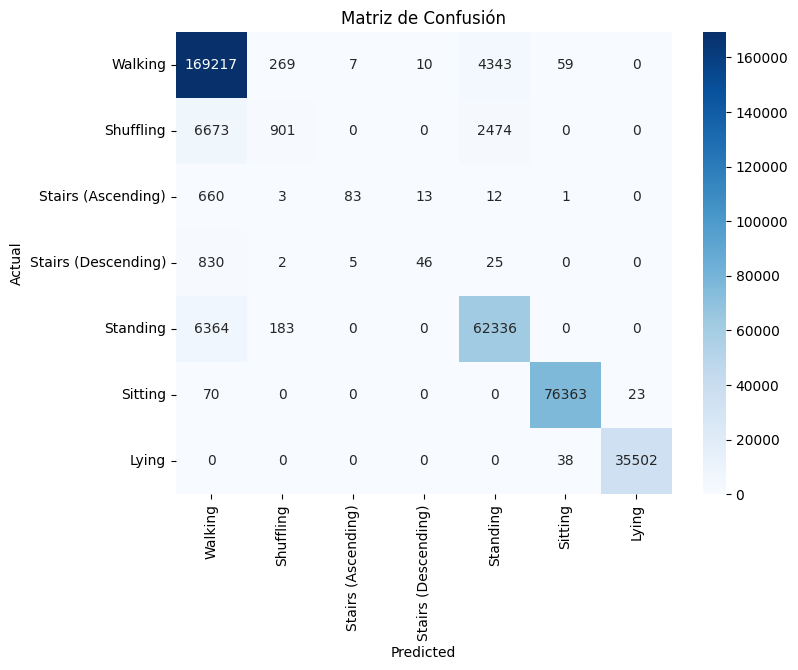

Accuracy: 0.9398000611166892
Classification Report:
               precision    recall  f1-score   support

           1       0.92      0.97      0.95    173905
           3       0.66      0.09      0.16     10048
           4       0.87      0.11      0.19       772
           5       0.67      0.05      0.09       908
           6       0.90      0.90      0.90     68883
           7       1.00      1.00      1.00     76456
           8       1.00      1.00      1.00     35540

    accuracy                           0.94    366512
   macro avg       0.86      0.59      0.61    366512
weighted avg       0.93      0.94      0.93    366512




LogisticRegression(max_iter=1000, random_state=42)


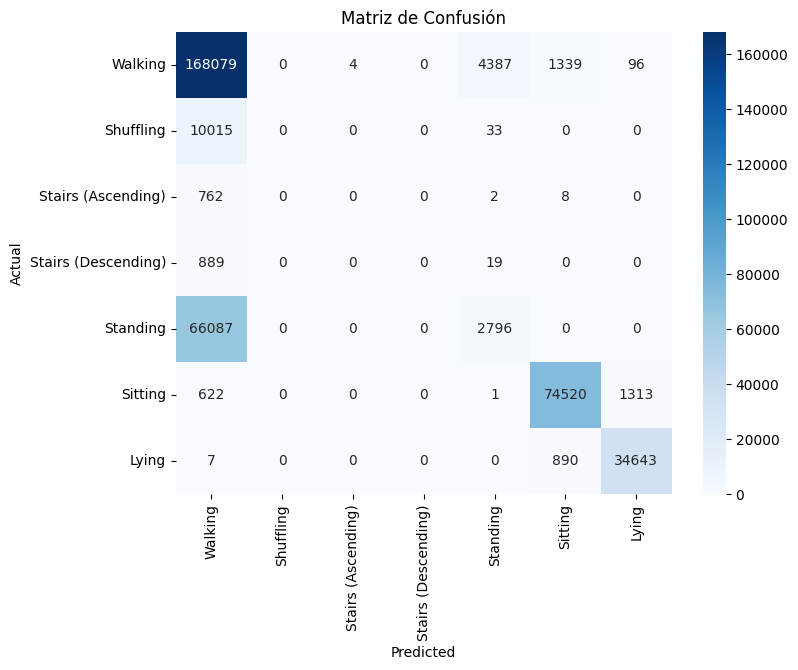

Accuracy: 0.764062295368228
Classification Report:
               precision    recall  f1-score   support

           1       0.68      0.97      0.80    173905
           3       1.00      0.00      0.00     10048
           4       0.00      0.00      1.00       772
           5       1.00      0.00      0.00       908
           6       0.39      0.04      0.07     68883
           7       0.97      0.97      0.97     76456
           8       0.96      0.97      0.97     35540

    accuracy                           0.76    366512
   macro avg       0.71      0.42      0.54    366512
weighted avg       0.72      0.76      0.69    366512






In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

model = [
    RandomForestClassifier(n_estimators=100, random_state=42),
    LogisticRegression(random_state=42, max_iter=1000),
    
]



for m in model:
    m.fit(X_train_scaled, y_train)
    y_pred = m.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, zero_division=1)
    print(m)
    # Crear una figura y un eje para el gráfico
    plt.figure(figsize=(8, 6))

    # Usar seaborn para crear el heatmap
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=classes, yticklabels=classes)

    # Configurar etiquetas de los ejes y el título
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Matriz de Confusión')

    # Mostrar el gráfico
    plt.show()
    print("Accuracy:", accuracy)
    print("Classification Report:\n", class_report)
    print("\n\n")




Probaremos con datos balanceados.

RandomForestClassifier(random_state=42)


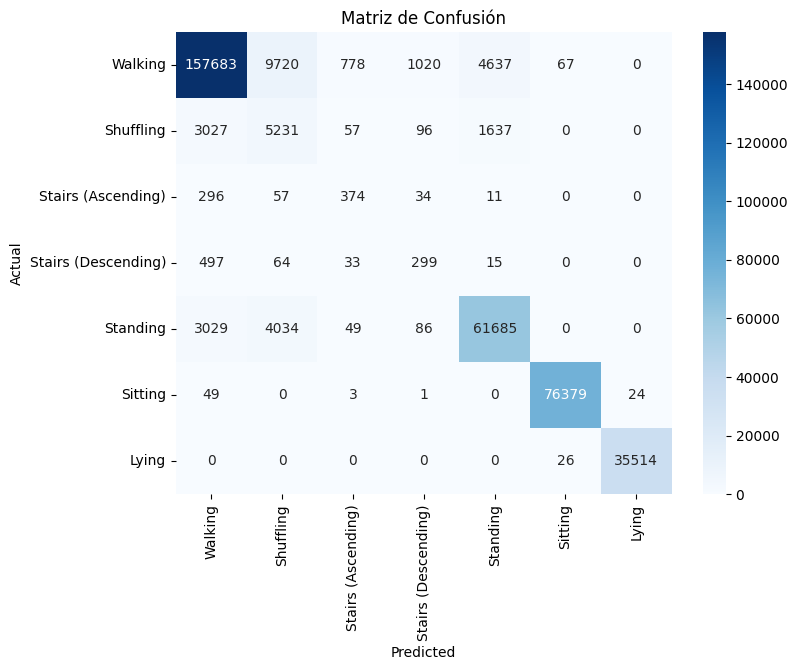

Accuracy: 0.9199289518487799
Classification Report:
               precision    recall  f1-score   support

           1       0.96      0.91      0.93    173905
           3       0.27      0.52      0.36     10048
           4       0.29      0.48      0.36       772
           5       0.19      0.33      0.24       908
           6       0.91      0.90      0.90     68883
           7       1.00      1.00      1.00     76456
           8       1.00      1.00      1.00     35540

    accuracy                           0.92    366512
   macro avg       0.66      0.73      0.69    366512
weighted avg       0.94      0.92      0.93    366512




LogisticRegression(max_iter=1000, random_state=42)


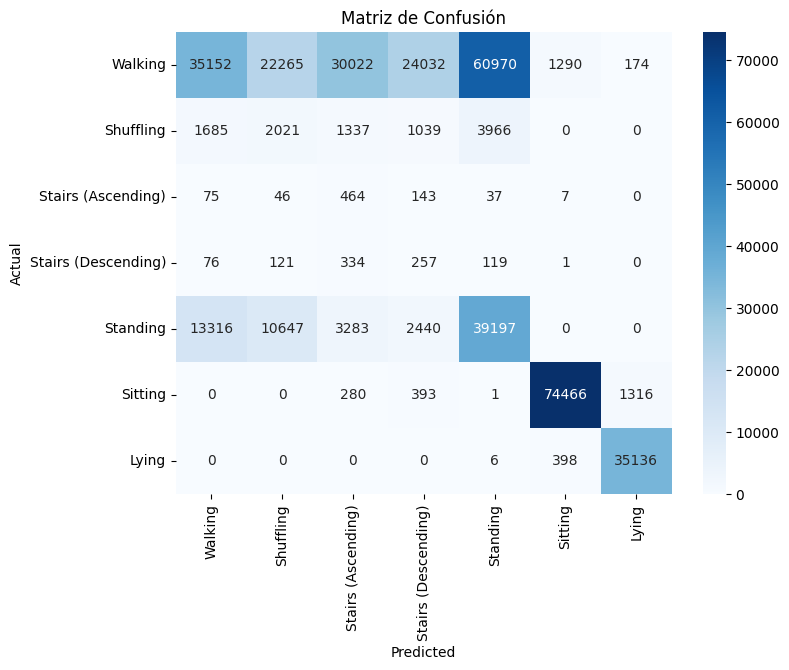

Accuracy: 0.5093775920024447
Classification Report:
               precision    recall  f1-score   support

           1       0.70      0.20      0.31    173905
           3       0.06      0.20      0.09     10048
           4       0.01      0.60      0.03       772
           5       0.01      0.28      0.02       908
           6       0.38      0.57      0.45     68883
           7       0.98      0.97      0.98     76456
           8       0.96      0.99      0.97     35540

    accuracy                           0.51    366512
   macro avg       0.44      0.55      0.41    366512
weighted avg       0.70      0.51      0.53    366512






In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns


# Definir las características (X) y la etiqueta (y)
X = combined_df.drop(columns=['label'])
y = combined_df['label']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear una instancia de SMOTE y aplicarlo al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Modelos y evaluación
model = [
    RandomForestClassifier(n_estimators=100, random_state=42),
    LogisticRegression(random_state=42, max_iter=1000),
]

for m in model:
    m.fit(X_train_resampled, y_train_resampled)
    y_pred = m.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, zero_division=1)
    print(m)
    
    # Crear una figura y un eje para el gráfico
    plt.figure(figsize=(8, 6))

    # Usar seaborn para crear el heatmap
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=classes, yticklabels=classes)

    # Configurar etiquetas de los ejes y el título
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Matriz de Confusión')

    # Mostrar el gráfico
    plt.show()
    print("Accuracy:", accuracy)
    print("Classification Report:\n", class_report)
    print("\n\n")

# Unificacion de clases
Unimos la clase 1 y 3 a una clase movimiento y la 4 y 5 a una clase Escaleras.

In [11]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

# Modelo 1
df_model = combined_df.copy()
df_model['label'] = df_model['label'].replace({5: 4})
df_model['label'] = df_model['label'].replace({3: 1})
classes = ['Walking', 'Stairs', 'Standing', 'Sitting', 'Lying']
X = df_model.drop(['label'], axis=1)
y = df_model['label']

# Realiza el balanceo de clases (puedes usar SMOTE)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

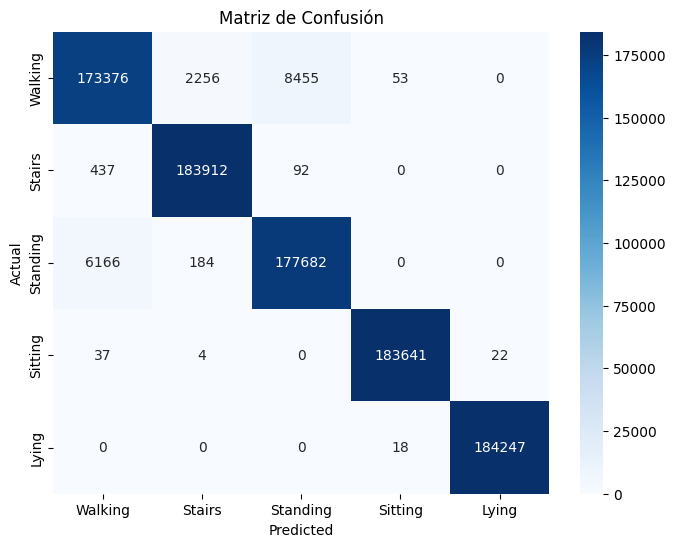

Accuracy: 0.9807469622477955
Classification Report:
               precision    recall  f1-score   support

           1       0.96      0.94      0.95    184140
           4       0.99      1.00      0.99    184441
           6       0.95      0.97      0.96    184032
           7       1.00      1.00      1.00    183704
           8       1.00      1.00      1.00    184265

    accuracy                           0.98    920582
   macro avg       0.98      0.98      0.98    920582
weighted avg       0.98      0.98      0.98    920582



In [54]:
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Crear una figura y un eje para el gráfico
plt.figure(figsize=(8, 6))

# Usar seaborn para crear el heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classes, yticklabels=classes)

# Configurar etiquetas de los ejes y el título
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')

# Mostrar el gráfico
plt.show()

print("Accuracy:", accuracy)
print("Classification Report:\n", class_report)

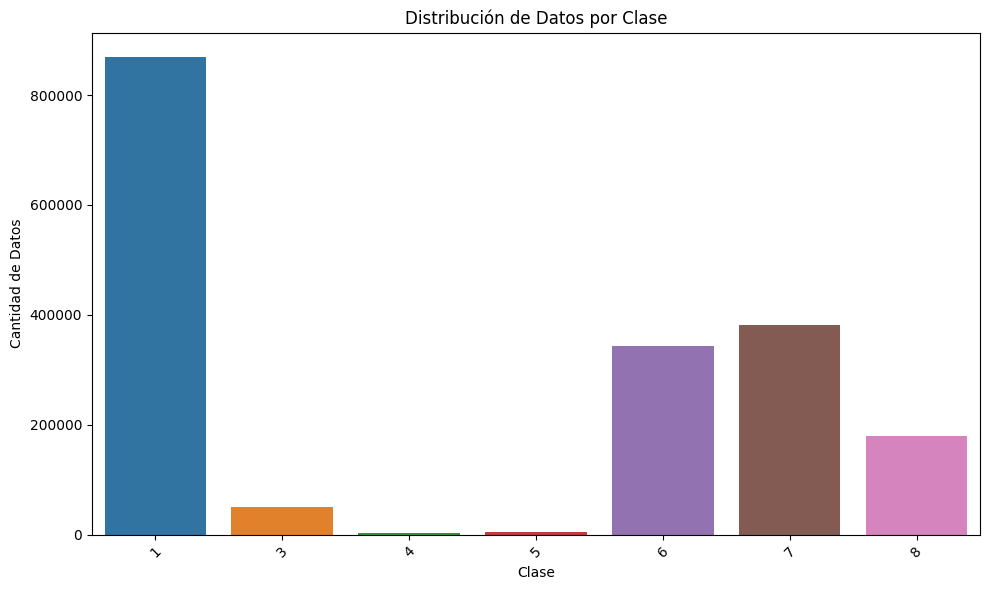

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que tienes un DataFrame llamado 'df' que contiene tus datos
# y que quieres visualizar la distribución de la columna 'label'

# Utiliza seaborn para crear un gráfico de barras de la distribución de 'label'
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_df, x='label')
plt.title('Distribución de Datos por Clase')
plt.xlabel('Clase')
plt.ylabel('Cantidad de Datos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




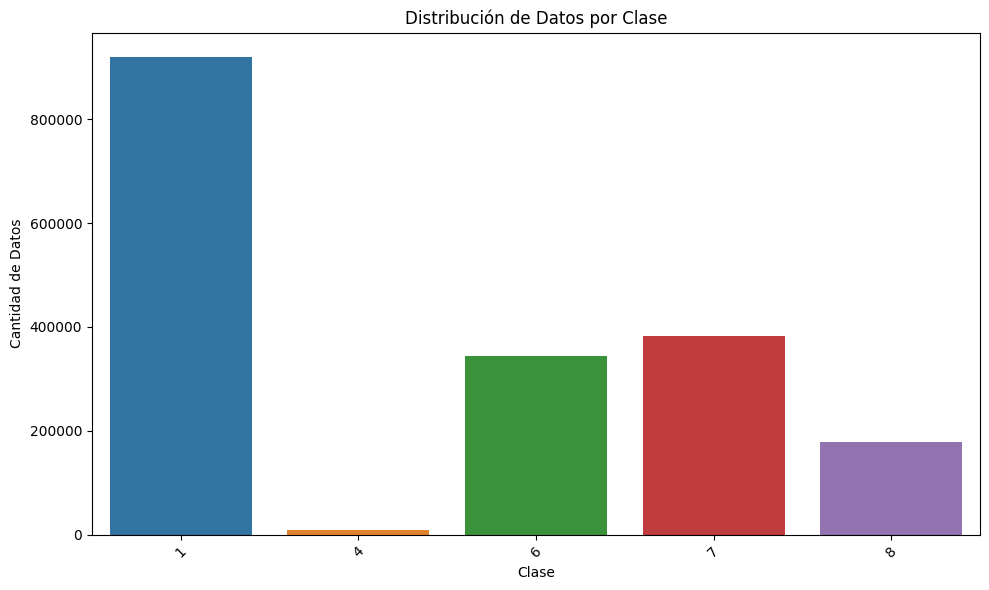

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que tienes un DataFrame llamado 'df' que contiene tus datos
# y que quieres visualizar la distribución de la columna 'label'

# Utiliza seaborn para crear un gráfico de barras de la distribución de 'label'
plt.figure(figsize=(10, 6))
sns.countplot(data=df_model, x='label')
plt.title('Distribución de Datos por Clase')
plt.xlabel('Clase')
plt.ylabel('Cantidad de Datos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


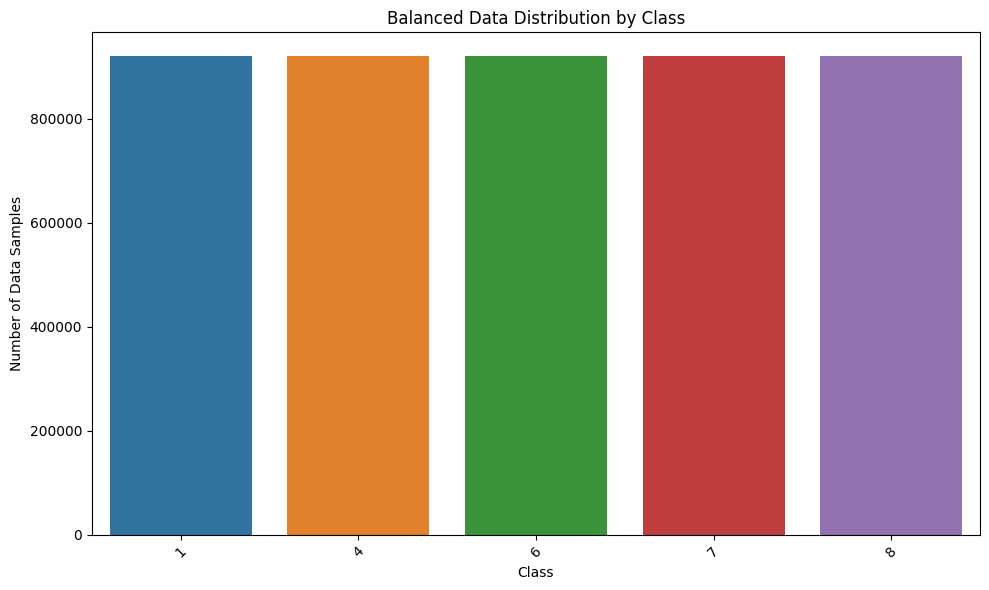

In [19]:
# Create a new DataFrame with the balanced data
df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced['label'] = y_resampled

# Use seaborn to create a countplot of the balanced 'label' column
plt.figure(figsize=(10, 6))
sns.countplot(data=df_balanced, x='label')
plt.title('Balanced Data Distribution by Class')
plt.xlabel('Class')
plt.ylabel('Number of Data Samples')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [55]:
import joblib

# Guardar el modelo en un archivo
joblib.dump(model, 'modelo_final.pkl')


['modelo_final.pkl']